In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from path_explain.utils import set_up_environment
from path_explain.path_explainer_tf import PathExplainerTF
from embedding_explainer import EmbeddingExplainerTF

In [3]:
set_up_environment(visible_devices='2')

In [4]:
batch_size = 10
test_size  = (32, 64)
data = np.random.randn(batch_size, *test_size).astype(np.float32)
baseline = np.zeros((1, *test_size)).astype(np.float32)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=test_size))
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=3, strides=1, activation=tf.keras.activations.softplus))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.softplus))
model.add(tf.keras.layers.Dense(units=1))

In [6]:
explainer = EmbeddingExplainerTF(model)

In [7]:
attributions = explainer.attributions(inputs=data,
                                      baseline=baseline,
                                      batch_size=50,
                                      num_samples=200,
                                      use_expectation=False,
                                      output_indices=0,
                                      verbose=True)

100%|██████████| 10/10 [00:00<00:00, 38.90it/s]


In [8]:
interactions = explainer.interactions(inputs=data,
                                      baseline=baseline,
                                      batch_size=50,
                                      num_samples=200,
                                      use_expectation=False,
                                      output_indices=0,
                                      verbose=True)

100%|██████████| 10/10 [00:12<00:00,  1.27s/it]


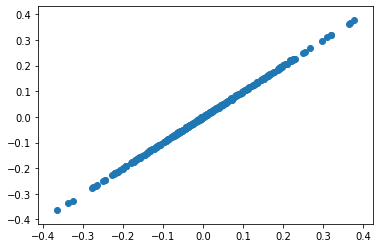

In [9]:
plt.scatter(x=np.reshape(attributions, -1),
            y=np.reshape(np.sum(interactions, axis=-1), -1))

In [10]:
orig_explainer = PathExplainerTF(model)

In [11]:
orig_attributions = orig_explainer.attributions(inputs=data,
                                      baseline=baseline,
                                      batch_size=50,
                                      num_samples=200,
                                      use_expectation=False,
                                      output_indices=0,
                                      verbose=True)

100%|██████████| 10/10 [00:00<00:00, 47.12it/s]


In [12]:
orig_interactions = orig_explainer.interactions(inputs=data,
                                      baseline=baseline,
                                      batch_size=50,
                                      num_samples=200,
                                      use_expectation=False,
                                      output_indices=0,
                                      verbose=True)

100%|██████████| 10/10 [01:48<00:00, 10.80s/it]


In [13]:
orig_attributions_summed = np.sum(orig_attributions, axis=2)
orig_interactions_summed = np.sum(orig_interactions, axis=(2, 4))

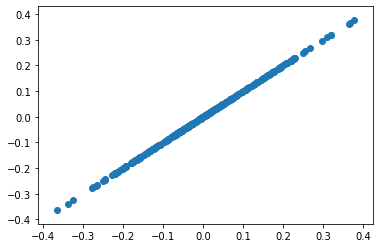

In [14]:
plt.scatter(x=np.reshape(attributions, -1),
            y=np.reshape(orig_attributions_summed, -1))

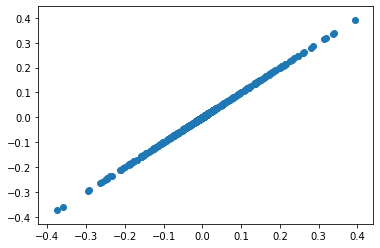

In [15]:
plt.scatter(x=np.reshape(interactions, -1),
            y=np.reshape(orig_interactions_summed, -1))